### Case Study 4 :  Data Science Shark Tank

***Due Date: December 8, before 6pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 5:59pm on Nov 18. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on Dec 9.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!
 
 ![Bilby Stampede](https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg)

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

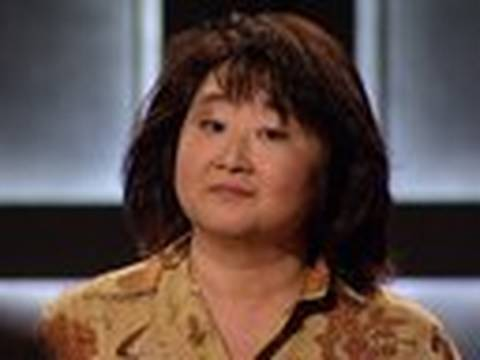

In [86]:
# Should your project be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

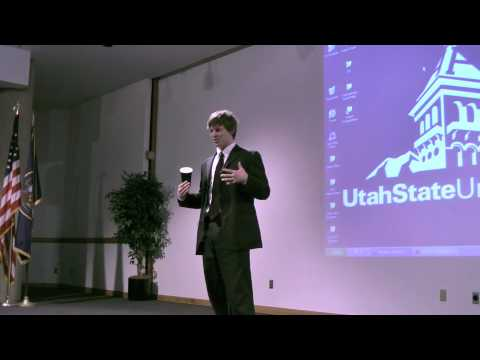

In [87]:
# Or should your project be like this?

YouTubeVideo("i6O98o2FRHw") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


** APIs **
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [88]:
# imports
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from matplotlib import pyplot
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [89]:
#marketing_data

# Feature Engineering:
# For our target variable, we chose to combine the promotion columns into one feature in which
# 0 represents if the customer did not accept the promotion, 1-6 represents if the customer did 
# accept the promotion on the respective campaign.

marketing_data = pd.read_csv("marketing_campaign.csv", delimiter="\t")

campaign_accepted = np.repeat(0, len(marketing_data))

campaign_accepted[marketing_data["Response"] == 1] = 6

for i in range(5,0,-1):
    column_name = "AcceptedCmp" + str(i)
    campaign_accepted[marketing_data[column_name] == 1] = i

marketing_data.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)
marketing_data["CampaignAccepted"] = campaign_accepted

Text(0.5, 1.0, 'Accepted Campaigns by Age Group')

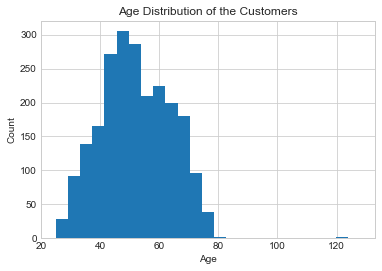

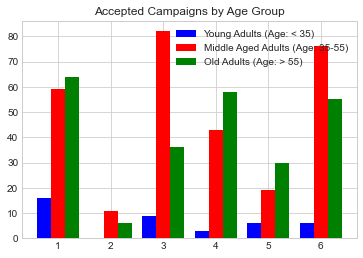

In [90]:
# AGE ANALYSIS

# Acquire the birth year and campaign number information
marketing_data_age = marketing_data.loc[:,['Year_Birth', 'CampaignAccepted']]
marketing_data_age.loc[:,'Age'] = 2021 - marketing_data_age.loc[:,'Year_Birth']

# Age distrubution of the customers
plt.hist(x=marketing_data_age["Age"], bins=25)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age Distribution of the Customers')

# Remove the customers who did not accept the campaign
marketing_data_age_filtered1 = marketing_data_age[marketing_data_age.CampaignAccepted != 0]

# Put customers into age groups
young = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age < 35")['CampaignAccepted'].values
middle = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age > 35 AND Age < 55")['CampaignAccepted'].values
old = pysqldf("SELECT * FROM marketing_data_age_filtered1 WHERE Age > 55")['CampaignAccepted'].values

accepted_campaign_by_age = [] #list
accepted_campaign_by_age.append(list(young))
accepted_campaign_by_age.append(list(middle))
accepted_campaign_by_age.append(list(old))

fig,ax = plt.subplots()
labels = ['Young Adults (Age: < 35)', 'Middle Aged Adults (Age: 35-55)', 'Old Adults (Age: > 55)']
colors = ['blue','red','green']
ax.hist(accepted_campaign_by_age, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Age Group")

In [91]:
# Find the ratio of a campaign acceptance number to the whole for each age group 
young_list = young.tolist()
middle_list = middle.tolist()
old_list = old.tolist()

young_number = len(young_list)
middle_number = len(middle_list)
old_number = len(old_list)

young_ratio_1 = 100*young_list.count(1)/young_number
young_ratio_2 = 100*young_list.count(2)/young_number
young_ratio_3 = 100*young_list.count(3)/young_number
young_ratio_4 = 100*young_list.count(4)/young_number
young_ratio_5 = 100*young_list.count(5)/young_number
young_ratio_6 = 100*young_list.count(6)/young_number

middle_ratio_1 = 100*middle_list.count(1)/middle_number
middle_ratio_2 = 100*middle_list.count(2)/middle_number
middle_ratio_3 = 100*middle_list.count(3)/middle_number
middle_ratio_4 = 100*middle_list.count(4)/middle_number
middle_ratio_5 = 100*middle_list.count(5)/middle_number
middle_ratio_6 = 100*middle_list.count(6)/middle_number

old_ratio_1 = 100*old_list.count(1)/old_number
old_ratio_2 = 100*old_list.count(2)/old_number
old_ratio_3 = 100*old_list.count(3)/old_number
old_ratio_4 = 100*old_list.count(4)/old_number
old_ratio_5 = 100*old_list.count(5)/old_number
old_ratio_6 = 100*old_list.count(6)/old_number

age_ratios = [[young_ratio_1, young_ratio_2, young_ratio_3, young_ratio_4, young_ratio_5, young_ratio_6],[middle_ratio_1, middle_ratio_2, middle_ratio_3, middle_ratio_4, middle_ratio_5, middle_ratio_6], [old_ratio_1, old_ratio_2, old_ratio_3, old_ratio_4, old_ratio_5, old_ratio_6]]

print(age_ratios)

[[40.0, 0.0, 22.5, 7.5, 15.0, 15.0], [20.344827586206897, 3.793103448275862, 28.275862068965516, 14.827586206896552, 6.551724137931035, 26.20689655172414], [25.70281124497992, 2.4096385542168677, 14.457831325301205, 23.29317269076305, 12.048192771084338, 22.08835341365462]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Age Groups')

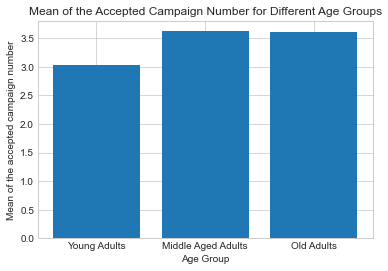

In [92]:
# Find the mean of the accepted campaign for each age group

mean_young = sum(young_list)/a
mean_middle = sum(middle_list)/b
mean_old = sum(old_list)/c

y_mean = [mean_young, mean_middle, mean_old]
x_mean = ['Young Adults', 'Middle Aged Adults', 'Old Adults']

fig,ax = plt.subplots(1)
ax.bar(x_mean,y_mean)
plt.xlabel('Age Group')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Age Groups')


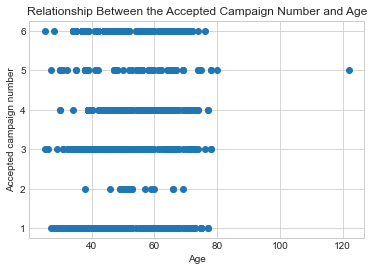

0.034554098111112756

In [93]:
# Correlation between age and campaign number accepted
plt.scatter(marketing_data_age_filtered1.Age, marketing_data_age_filtered1.CampaignAccepted)
plt.xlabel('Age')
plt.ylabel('Accepted campaign number')
plt.title('Relationship Between the Accepted Campaign Number and Age')
plt.show()
corr, _ = pearsonr(marketing_data_age_filtered1.Age, marketing_data_age_filtered1.CampaignAccepted)
corr


Text(0.5, 1.0, 'Age Distribution of the Customers who did not Accept the Offer')

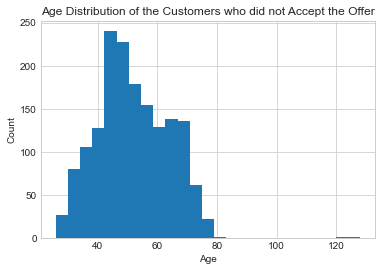

In [94]:
# Include only the customers that did not accept the campaign
marketing_data_age_filtered2 = marketing_data_age[marketing_data_age.CampaignAccepted == 0]

# Histogram plot of the age groups that did not accept the campaign 
plt.hist(x=marketing_data_age_filtered2["Age"], bins=25)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age Distribution of the Customers who did not Accept the Offer')

Text(0.5, 1.0, 'Age Distribution of the Customers who did not Accept the Offer')

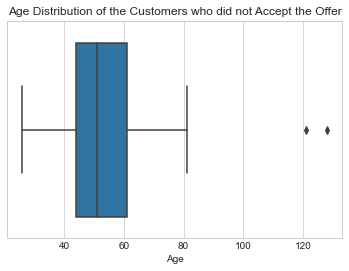

In [95]:
sns.boxplot(x=marketing_data_age_filtered2["Age"])
plt.title('Age Distribution of the Customers who did not Accept the Offer')

In [96]:
# Put customers into age groups
young_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age < 35")
middle_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age > 35 AND Age < 55")
old_nocamp = pysqldf("SELECT * FROM marketing_data_age_filtered2 WHERE Age > 55")

young_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age < 35")
middle_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age > 35 AND Age < 55")
old_total = pysqldf("SELECT * FROM marketing_data_age WHERE Age > 55")

# Find the likelihood of each group to reject a campaign
young_reject = len(young_nocamp)/len(young_total)
middle_reject = len(middle_nocamp)/len(middle_total)
old_reject = len(old_nocamp)/len(old_total)

reject_likelihood = [young_reject, middle_reject, old_reject]
print(reject_likelihood)

[0.7278911564625851, 0.7458369851007888, 0.7104651162790697]


Text(0.5, 1.0, 'Accepted Campaigns by Education Level')

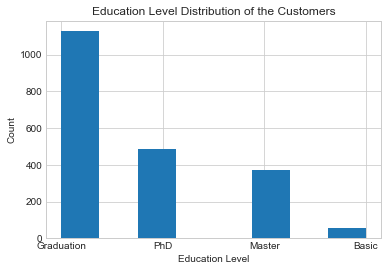

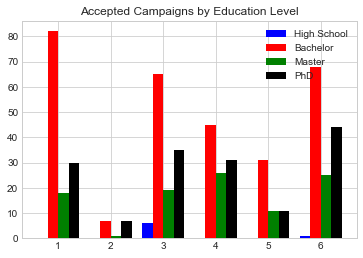

In [97]:
# EDUCATION LEVEL ANALYSIS

marketing_data_education = marketing_data[['Education', 'CampaignAccepted']]
# Remove the unidentified column: 2ncycle. It is not clear what  these education level corresponds to
marketing_data_education = marketing_data_education[marketing_data_education.Education != '2n Cycle']

# Education level distrubution of the customers
plt.hist(x=marketing_data_education["Education"], bins=8)
plt.xlabel('Education Level')
plt.ylabel("Count")
plt.title('Education Level Distribution of the Customers')

# Include only the customers that accepted the campaign
marketing_data_education_filtered1 = marketing_data_education[marketing_data_education.CampaignAccepted != 0]

# Put customers into education groups
bachelor = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Graduation'")['CampaignAccepted'].values
phd = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'PhD' ")['CampaignAccepted'].values
master = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Master'")['CampaignAccepted'].values
high_school = pysqldf("SELECT * FROM marketing_data_education_filtered1 WHERE Education = 'Basic' ")['CampaignAccepted'].values

accepted_campaign_by_education = [] #list
accepted_campaign_by_education.append(list(high_school))
accepted_campaign_by_education.append(list(bachelor))
accepted_campaign_by_education.append(list(master))
accepted_campaign_by_education.append(list(phd))


fig,ax = plt.subplots()
labels = ['High School', 'Bachelor', 'Master', 'PhD']
colors = ['blue','red','green', 'black']
ax.hist(accepted_campaign_by_education, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Education Level")

In [98]:
# Find the ratio of a campaign acceptance number to the whole for each education level 
high_list = high_school.tolist()
bachelor_list = bachelor.tolist()
master_list = master.tolist()
phd_list = phd.tolist()

high_number = len(high_list)
bachelor_number = len(bachelor_list)
master_number = len(master_list)
phd_number = len(phd_list)

high_ratio_1 = 100*high_list.count(1)/high_number
high_ratio_2 = 100*high_list.count(2)/high_number
high_ratio_3 = 100*high_list.count(3)/high_number
high_ratio_4 = 100*high_list.count(4)/high_number
high_ratio_5 = 100*high_list.count(5)/high_number
high_ratio_6 = 100*high_list.count(6)/high_number

bachelor_ratio_1 = 100*bachelor_list.count(1)/bachelor_number
bachelor_ratio_2 = 100*bachelor_list.count(2)/bachelor_number
bachelor_ratio_3 = 100*bachelor_list.count(3)/bachelor_number
bachelor_ratio_4 = 100*bachelor_list.count(4)/bachelor_number
bachelor_ratio_5 = 100*bachelor_list.count(5)/bachelor_number
bachelor_ratio_6 = 100*bachelor_list.count(6)/bachelor_number

master_ratio_1 = 100*master_list.count(1)/master_number
master_ratio_2 = 100*master_list.count(2)/master_number
master_ratio_3 = 100*master_list.count(3)/master_number
master_ratio_4 = 100*master_list.count(4)/master_number
master_ratio_5 = 100*master_list.count(5)/master_number
master_ratio_6 = 100*master_list.count(6)/master_number

phd_ratio_1 = 100*phd_list.count(1)/phd_number
phd_ratio_2 = 100*phd_list.count(2)/phd_number
phd_ratio_3 = 100*phd_list.count(3)/phd_number
phd_ratio_4 = 100*phd_list.count(4)/phd_number
phd_ratio_5 = 100*phd_list.count(5)/phd_number
phd_ratio_6 = 100*phd_list.count(6)/phd_number

education_ratios = [[high_ratio_1, high_ratio_2, high_ratio_3, high_ratio_4, high_ratio_5, high_ratio_6],[bachelor_ratio_1, bachelor_ratio_2, bachelor_ratio_3, bachelor_ratio_4, bachelor_ratio_5, bachelor_ratio_6], [master_ratio_1, master_ratio_2, master_ratio_3, master_ratio_4, master_ratio_5, master_ratio_6], [phd_ratio_1, phd_ratio_2, phd_ratio_3, phd_ratio_4, phd_ratio_5, phd_ratio_6]]

print(education_ratios)

[[0.0, 0.0, 85.71428571428571, 0.0, 0.0, 14.285714285714286], [27.516778523489933, 2.348993288590604, 21.812080536912752, 15.100671140939598, 10.40268456375839, 22.818791946308725], [18.0, 1.0, 19.0, 26.0, 11.0, 25.0], [18.9873417721519, 4.430379746835443, 22.151898734177216, 19.620253164556964, 6.962025316455696, 27.848101265822784]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Education Levels')

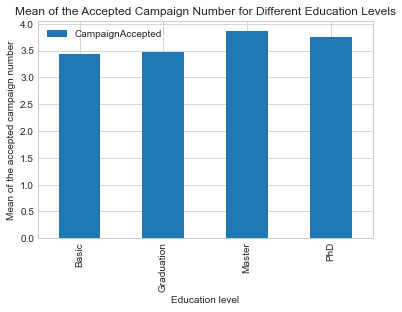

In [99]:
# Find the mean of the accepted campaign number for each education level
#  Group rows from marketing_data_age into lists by the age
marketing_data_education_grouped1 = marketing_data_education_filtered1.groupby('Education').mean()

# Plot the data
ax = marketing_data_education_grouped1.plot.bar(y = 'CampaignAccepted')
plt.xlabel('Education level')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Education Levels')

In [100]:
# Include only the customers that did not accept the campaign
marketing_data_education_filtered2 = marketing_data_education[marketing_data_education.CampaignAccepted == 0]

marketing_data_education_grouped2 = marketing_data_education_filtered2.groupby('Education').size().reset_index(name='Counts')


In [101]:
# Put customers into age groups
bachelor_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Graduation'")
phd_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'PhD' ")
master_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Master'")
high_nocamp = pysqldf("SELECT * FROM marketing_data_education_filtered2 WHERE Education = 'Basic' ")

bachelor_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Graduation'")
phd_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'PhD' ")
master_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Master'")
high_total = pysqldf("SELECT * FROM marketing_data_education WHERE Education = 'Basic' ")

# Find the likelihood of each group to reject a campaign
bachelor_reject = len(bachelor_nocamp)/len(bachelor_total)
phd_reject = len(phd_nocamp)/len(phd_total)
master_reject = len(master_nocamp)/len(master_total)
high_reject = len(high_nocamp)/len(high_total)

reject_likelihood2 = [high_reject, bachelor_reject, master_reject, phd_reject]
print(reject_likelihood2)

[0.8703703703703703, 0.735581188997338, 0.7297297297297297, 0.6748971193415638]


Text(0.5, 1.0, 'Accepted Campaigns by Marital Status')

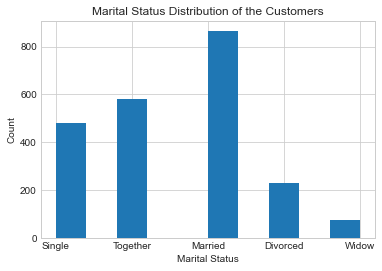

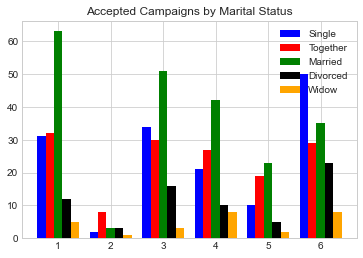

In [102]:
# MARITAL STATUS ANALYSIS

marketing_data_ms = marketing_data[['Marital_Status', 'CampaignAccepted']]

# Remove the unidentified columns: absurd, YOLO and alone.
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'Absurd']
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'Alone']
marketing_data_ms = marketing_data_ms[marketing_data_ms.Marital_Status != 'YOLO']

# Education level distrubution of the customers
plt.hist(x=marketing_data_ms["Marital_Status"], bins=10)
plt.xlabel('Marital Status')
plt.ylabel("Count")
plt.title('Marital Status Distribution of the Customers')

# Include only the customers that accepted the campaign
marketing_data_ms_filtered1 = marketing_data_ms[marketing_data_ms.CampaignAccepted != 0]

# Put customers into marital status groups
single = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Single'")['CampaignAccepted'].values
together = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Together'")['CampaignAccepted'].values
married = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Married'")['CampaignAccepted'].values
divorced = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Divorced'")['CampaignAccepted'].values
widow = pysqldf("SELECT * FROM marketing_data_ms_filtered1 WHERE Marital_Status = 'Widow'")['CampaignAccepted'].values

accepted_campaign_by_ms = [] #list
accepted_campaign_by_ms.append(list(single))
accepted_campaign_by_ms.append(list(together))
accepted_campaign_by_ms.append(list(married))
accepted_campaign_by_ms.append(list(divorced))
accepted_campaign_by_ms.append(list(widow))


fig,ax = plt.subplots()
labels = ['Single', 'Together', 'Married', 'Divorced', 'Widow']
colors = ['blue','red','green', 'black', 'orange']
ax.hist(accepted_campaign_by_ms, bins=6 , range=[0.5 , 6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted Campaigns by Marital Status")



In [103]:
# Find the ratio of a campaign acceptance number to the whole for each education level 
single_list = single.tolist()
together_list = together.tolist()
married_list = married.tolist()
divorced_list = divorced.tolist()
widow_list = widow.tolist()

single_number = len(single_list)
together_number = len(together_list)
married_number = len(married_list)
divorced_number = len(divorced_list)
widow_number = len(widow_list)

single_ratio_1 = 100*single_list.count(1)/single_number
single_ratio_2 = 100*single_list.count(2)/single_number
single_ratio_3 = 100*single_list.count(3)/single_number
single_ratio_4 = 100*single_list.count(4)/single_number
single_ratio_5 = 100*single_list.count(5)/single_number
single_ratio_6 = 100*single_list.count(6)/single_number

together_ratio_1 = 100*together_list.count(1)/together_number
together_ratio_2 = 100*together_list.count(2)/together_number
together_ratio_3 = 100*together_list.count(3)/together_number
together_ratio_4 = 100*together_list.count(4)/together_number
together_ratio_5 = 100*together_list.count(5)/together_number
together_ratio_6 = 100*together_list.count(6)/together_number

married_ratio_1 = 100*married_list.count(1)/married_number
married_ratio_2 = 100*married_list.count(2)/married_number
married_ratio_3 = 100*married_list.count(3)/married_number
married_ratio_4 = 100*married_list.count(4)/married_number
married_ratio_5 = 100*married_list.count(5)/married_number
married_ratio_6 = 100*married_list.count(6)/married_number

divorced_ratio_1 = 100*divorced_list.count(1)/divorced_number
divorced_ratio_2 = 100*divorced_list.count(2)/divorced_number
divorced_ratio_3 = 100*divorced_list.count(3)/divorced_number
divorced_ratio_4 = 100*divorced_list.count(4)/divorced_number
divorced_ratio_5 = 100*divorced_list.count(5)/divorced_number
divorced_ratio_6 = 100*divorced_list.count(6)/divorced_number

widow_ratio_1 = 100*widow_list.count(1)/widow_number
widow_ratio_2 = 100*widow_list.count(2)/widow_number
widow_ratio_3 = 100*widow_list.count(3)/widow_number
widow_ratio_4 = 100*widow_list.count(4)/widow_number
widow_ratio_5 = 100*widow_list.count(5)/widow_number
widow_ratio_6 = 100*widow_list.count(6)/widow_number

ms_ratios = [[single_ratio_1, single_ratio_2, single_ratio_3, single_ratio_4, single_ratio_5, single_ratio_6],[together_ratio_1, together_ratio_2, together_ratio_3, together_ratio_4, together_ratio_5, together_ratio_6], [married_ratio_1, married_ratio_2, married_ratio_3, married_ratio_4, married_ratio_5, married_ratio_6], [divorced_ratio_1, divorced_ratio_2, divorced_ratio_3, divorced_ratio_4, divorced_ratio_5, divorced_ratio_6],[widow_ratio_1, widow_ratio_2, widow_ratio_3, widow_ratio_4, widow_ratio_5, widow_ratio_6]]

print(ms_ratios)

[[20.945945945945947, 1.3513513513513513, 22.972972972972972, 14.18918918918919, 6.756756756756757, 33.78378378378378], [22.06896551724138, 5.517241379310345, 20.689655172413794, 18.620689655172413, 13.10344827586207, 20.0], [29.032258064516128, 1.3824884792626728, 23.502304147465438, 19.35483870967742, 10.599078341013826, 16.129032258064516], [17.391304347826086, 4.3478260869565215, 23.18840579710145, 14.492753623188406, 7.246376811594203, 33.333333333333336], [18.51851851851852, 3.7037037037037037, 11.11111111111111, 29.62962962962963, 7.407407407407407, 29.62962962962963]]


Text(0.5, 1.0, 'Mean of the Accepted Campaign Number for Different Marital Statuses')

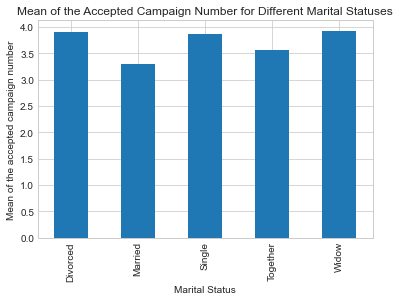

In [104]:
# Find the mean of the accepted campaign number for each marital status
#  Group rows from marketing_data_age into lists by the age
marketing_data_ms_grouped = marketing_data_ms_filtered1.groupby('Marital_Status').mean()

# Plot the data
ax = marketing_data_ms_grouped.plot.bar(y = 'CampaignAccepted', legend = None)
plt.xlabel('Marital Status')
plt.ylabel('Mean of the accepted campaign number')
plt.title('Mean of the Accepted Campaign Number for Different Marital Statuses')

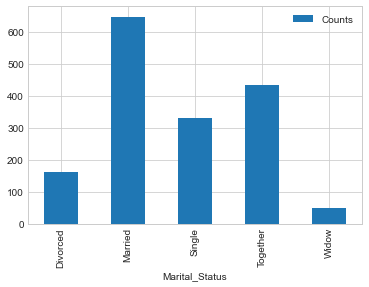

In [105]:
# Include only the customers that did not accept the campaign
marketing_data_ms_filtered2 = marketing_data_ms[marketing_data_ms.CampaignAccepted == 0]

marketing_data_ms_grouped2 = marketing_data_ms_filtered2.groupby('Marital_Status').size().reset_index(name='Counts')

# Plot the data
ax = marketing_data_ms_grouped2.plot.bar(x = 'Marital_Status' , y = 'Counts')


In [106]:
# Put customers into age groups
single_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Single'")
together_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Together' ")
married_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Married'")
divorced_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Divorced' ")
widow_nocamp = pysqldf("SELECT * FROM marketing_data_ms_filtered2 WHERE Marital_Status = 'Widow' ")

single_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Single'")
together_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Together' ")
married_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Married'")
divorced_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Divorced' ")
widow_total = pysqldf("SELECT * FROM marketing_data_ms WHERE Marital_Status = 'Widow' ")

# Find the likelihood of each group to reject a campaign
single_reject = len(single_nocamp)/len(single_total)
together_reject = len(together_nocamp)/len(together_total)
married_reject = len(together_nocamp)/len(together_total)
divorced_reject = len(divorced_nocamp)/len(divorced_total)
widow_reject = len(widow_nocamp)/len(widow_total)

reject_likelihood3 = [single_reject, together_reject, married_reject, divorced_reject, widow_reject]
print(reject_likelihood3)

[0.6916666666666667, 0.75, 0.75, 0.7025862068965517, 0.6493506493506493]


### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


In [107]:
# Part-1 predicting the campaign number

# Include only the customers that accepted the campaign at some point
marketing_data_filtered1 = marketing_data[marketing_data.CampaignAccepted != 0]

# Create the training and test sets
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(marketing_data_filtered1, test_size=0.1)

# Define functions to transform string entries to integers 

def transform_education(row):
    if row['Education'] == '2n Cycle':
        return 1
    elif row['Education'] == 'Basic':
        return 2
    elif row['Education'] == 'Graduation':
        return 3
    elif row['Education'] == 'Master':
        return 4
    elif row['Education'] == 'PhD':
        return 5
    else:
        return 0

def transform_ms(row):
    if row['Marital_Status'] == 'Absurd':
        return 1
    elif row['Marital_Status'] == 'Alone':
        return 2
    elif row['Marital_Status'] == 'Divorced':
        return 3
    elif row['Marital_Status'] == 'Married':
        return 4
    elif row['Marital_Status'] == 'Single':
        return 5
    elif row['Marital_Status'] == 'Together':
        return 6
    elif row['Marital_Status'] == 'Widow':
        return 6
    elif row['Marital_Status'] == 'YOLO':
        return 7
    else:
        return 0

train1.loc[:,'Education'] = train1.apply(transform_education, axis = 1)
train1.loc[:,'Marital_Status'] = train1.apply(transform_ms, axis = 1)
test1.loc[:,'Education'] = test1.apply(transform_education, axis = 1)
test1.loc[:,'Marital_Status'] = test1.apply(transform_ms, axis = 1)


C:\Users\Tuna\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [108]:
# Define the features, X

X_train1 = np.array([train1['Education'], train1['Marital_Status'], train1['Income'],train1['Year_Birth']]).T
X_test1 = np.array([test1['Education'], test1['Marital_Status'], test1['Income'],test1['Year_Birth']]).T

# Define the target variable, y

y_train1 = np.array([train1['CampaignAccepted']]).T
y_test1 = np.array([test1['CampaignAccepted']]).T

In [109]:
# Replace nan with mean of the nan column
# Find the mean
col_mean = np.nanmean(X_train1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_train1))

#Place column means in the indices. Align the arrays using take
X_train1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(X_test1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_test1))

#Place column means in the indices. Align the arrays using take
X_test1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_train1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_train1))

#Place column means in the indices. Align the arrays using take
y_train1[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_test1, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_test1))

#Place column means in the indices. Align the arrays using take
y_test1[inds] = np.take(col_mean, inds[1])

In [110]:
# Use the Random Forest Classifier to predict the number of campaigns

def RF_Classifier(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train.ravel())
    y_predict = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    return(accuracy)


In [111]:
accuracy_rf1 = RF_Classifier(X_train1, y_train1, X_test1, y_test1)
accuracy_rf1

0.4098360655737705

In [112]:
# Part-2 predicting whether the campaign is accepted or not

# Make the CampaignAccepted column binary
marketing_data_filtered2 = marketing_data
marketing_data_filtered2['CampaignAccepted'].loc[marketing_data_filtered2['CampaignAccepted'] != 0] = 1

# Split the training and testing sets
train2, test2 = train_test_split(marketing_data_filtered2, test_size=0.1)

# Transform string entries to integers
train2.loc[:,'Education'] = train1.apply(transform_education, axis = 1)
train2.loc[:,'Marital_Status'] = train1.apply(transform_ms, axis = 1)
test2.loc[:,'Education'] = test1.apply(transform_education, axis = 1)
test2.loc[:,'Marital_Status'] = test1.apply(transform_ms, axis = 1)

# Define the features, X

X_train2 = np.array([train2['Education'], train2['Marital_Status'], train2['Income'], train2['Year_Birth']]).T
X_test2 = np.array([test2['Education'], test2['Marital_Status'],  test2['Income'], test2['Year_Birth']]).T

# Define the target variable, y

y_train2 = np.array([train2['CampaignAccepted']]).T
y_test2 = np.array([test2['CampaignAccepted']]).T

# Replace nan with mean of the nan column
# Find the mean
col_mean = np.nanmean(X_train2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_train2))

#Place column means in the indices. Align the arrays using take
X_train2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(X_test2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(X_test2))

#Place column means in the indices. Align the arrays using take
X_test2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_train2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_train2))

#Place column means in the indices. Align the arrays using take
y_train2[inds] = np.take(col_mean, inds[1])

# Find the mean
col_mean = np.nanmean(y_test2, axis=0)

# Find indices that you need to replace
inds = np.where(np.isnan(y_test2))

#Place column means in the indices. Align the arrays using take
y_test2[inds] = np.take(col_mean, inds[1])


C:\Users\Tuna\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Tuna\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [113]:
# Use the Random Forest Classifier to predict whether the campaign is accepted or not

accuracy_rf2 = RF_Classifier(X_train2, y_train2, X_test2, y_test2)
accuracy_rf2


0.7410714285714286

### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
